In [19]:
# Analysis of Time Prediction vs Volume
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

#train test split
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.datasets import make_blobs


In [20]:



def volume_time_precision(financial_data):
    # Analysis of Time Prediction vs Volume
    # We are going to cluster the data based on the volume and time
    # We will first plot all the data points in a scatter plot per hour of the day
    # Our data is in 4 hour intervals so we will have 6 clusters
    
    
    # Getting only the first 100 rows
    financial_data = financial_data[:100]
    
    # up till 24 hours
    clusters = { "0": [], "1": [], "2": [], "3": [], "4": [], "5": [], "6": [], "7": [], 
                "8": [], "9": [], "10": [], "11": [], "12": [], "13": [], "14": [], "15": [], 
                "16": [], "17": [], "18": [], "19": [], "20": [], "21": [], "22": [], "23": []}
    

    # Hours in the data
    dates = financial_data["date"]
    for idx,hour in enumerate(dates):
        # Get the hour
        hour = int(hour.split(" ")[1].split(":")[0])
        # Get the volume
        volume = financial_data["Volume"][idx]
        # Get the time
        
        # Add the volume to the cluster even if it is not in the cluster
        clusters[str(hour)].append(volume)
        
        
    # Plot the data
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    # X axis is the time
    # Y axis is the volume
    reports_per_hour = []
    for key in clusters.keys():
        ax.scatter(clusters[key], [int(key) for i in range(len(clusters[key]))], label=key)
        
        #Statistics
        if len(clusters[key]) == 0:
            continue
        hour_reports = {}
        hour_reports["hour"] = key
        hour_reports["mean"] = np.mean(clusters[key])
        hour_reports["std"] = np.std(clusters[key])
        hour_reports["median"] = np.median(clusters[key])
        hour_reports["min"] = np.min(clusters[key])
        hour_reports["max"] = np.max(clusters[key])
        reports_per_hour.append(hour_reports)


        
    plt.show()   
    # save the plot under 
    
    
    # Draw the box plot
    fig = plt.figure(figsize =(10, 7))
    ax = fig.add_subplot(111)
    ax.set_title('Volume per hour')
    ax.set_ylabel('Volume')
    ax.set_xlabel('Hour')
    
    for key in clusters.keys():
        ax.boxplot(clusters[key], positions=[int(key)], widths=0.6,showmeans=True, meanline=True, showfliers=False, sym='.')
    
    # Top right explanation of mean and median 
    ax.plot([], c='blue', label='Mean')
    ax.plot([], c='orange', label='Median')

    plt.legend()

        
    
    
    # save the plot under volumte_time_analysis_histogram.png
    plt.savefig("volumte_time_analysis_histogram.png")
        
    plt.show()
    
      
    # The busiest hour is the hour where the most reports are
    busiest_hour = max(reports_per_hour, key=lambda x:x["mean"])
    print("Busiest hour: ", busiest_hour)
              
    # print the close prices of the first 50 rows to see the data but higlight each hour with a different color
    # We will use the same colors as the scatter plot
    
    # Plot the data
    financial_data = financial_data[:25]
    sample_time_frame_close = financial_data["close"]
    sample_time_frame_date = financial_data["date"]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.plot(sample_time_frame_close)
    vals = []
    
    for idx,hour in enumerate(sample_time_frame_date):
        # Get the hour
        hour = int(hour.split(" ")[1].split(":")[0])
        vals.append(hour)
        
    
    # color matching to hour
    hour_color = {
        "0": "blue", "1": "orange", "2": "green", "3": "red",
        "4": "purple", "5": "brown", "6": "pink", "7": "gray",
        "8": "olive", "9": "cyan", "10": "black", "11": "yellow",
        "12": "teal", "13": "violet", "14": "maroon", "15": "turquoise",
        "16": "indigo", "17": "beige", "18": "lavender", "19": "salmon",
        "20": "navy", "21": "gold", "22": "lime", "23": "darkgreen"
    }

    # Plot the data
    for idx,hour in enumerate(sample_time_frame_date):
        # Get the hour
        hour = int(hour.split(" ")[1].split(":")[0])
        ax.scatter(idx, sample_time_frame_close[idx], c=hour_color[str(hour)], label=hour)
        ax.annotate(str(hour), (idx, sample_time_frame_close[idx]))
    
    # x axis needs to be numbers from 0 to 24
    ax.set_xticks(np.arange(len(sample_time_frame_close)))
    plt.savefig("volumte_time_analysis_linechart.png")
    plt.show()
    
    
    


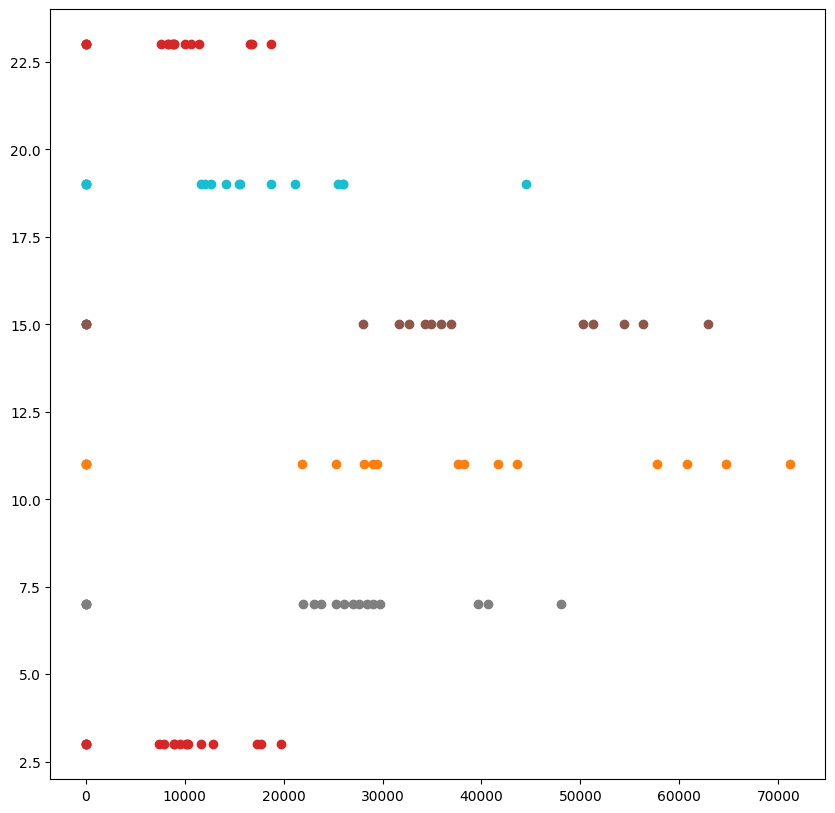

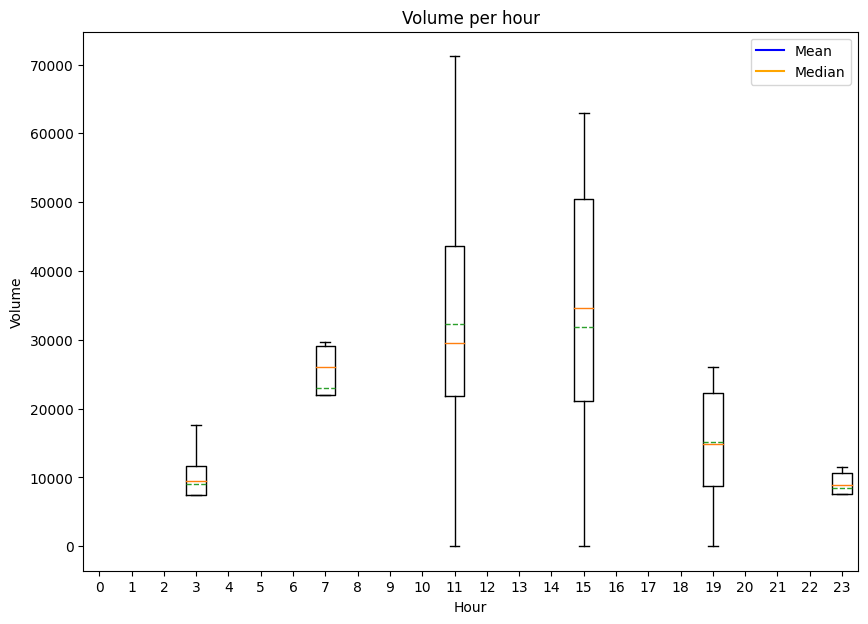

Busiest hour:  {'hour': '11', 'mean': 32313.477041176473, 'std': 22573.73216546535, 'median': 29475.1396, 'min': 0.0, 'max': 71204.2812}


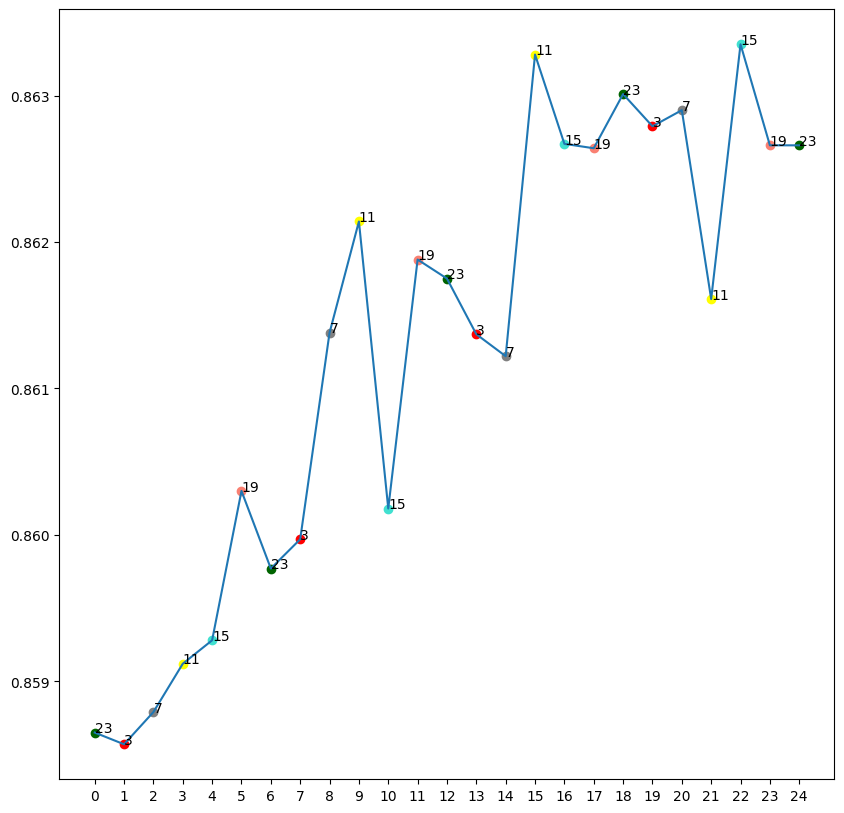

In [21]:
financial_data = pd.read_csv('../data/EURGBP_Candlestick_4_Hour_BID_23.07.2013-22.07.2023.csv')

volume_time_precision(financial_data)